In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
# Load the data
df = pd.read_csv("../data/train.csv")

In [4]:
# Import dataProcessor class from data_processor.py file
from data_processor import DataProcessor

data_processor = DataProcessor(pd.read_csv("../data/train.csv")) 
df_num = data_processor.numerical_data()
df_ord = df[data_processor.ordinal_cols]
df_ord.head()
# df_ord = data_processor.ordinal_data()

,LandSlope,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gtl,Gd,TA,GLQ,Unf,Ex,SBrkr,Gd,Typ,NaN,TA,TA,NaN
1,Gtl,Gd,TA,ALQ,Unf,Ex,SBrkr,TA,Typ,TA,TA,TA,NaN
2,Gtl,Gd,TA,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,TA,TA,NaN
3,Gtl,TA,Gd,ALQ,Unf,Gd,SBrkr,Gd,Typ,Gd,TA,TA,NaN
4,Gtl,Gd,TA,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,TA,TA,NaN


In [5]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,250000


In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the ordinal data
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df_ord)

# Convert the encoded data back to a DataFrame
encoded_ord_df = pd.DataFrame(encoded_data, columns=df_ord.columns)

# Add salesPrice column to the encoded_ord_df
encoded_ord_df['SalePrice'] = df_num['SalePrice']

encoded_ord_df.head()


,LandSlope,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,NaN,4.0,4.0,NaN,208500
1,0.0,2.0,3.0,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,NaN,181500
2,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,NaN,223500
3,0.0,3.0,1.0,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,NaN,140000
4,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,NaN,250000


Analysis of **Numerical** data
1. Use correlation matrix to find top features.
2. Use pairplot to visualize them.1

In [20]:
# Find the correlation between the numerical data and the target
correlation = df_num.corr()
correlation = correlation['SalePrice'].sort_values(ascending=False)
correlation = correlation.drop('SalePrice')
print(correlation)

# Save csv file
# correlation.to_csv('../data/num_correlation.csv')


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
FireplaceQu      0.378377
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
GarageCond       0.275781
LotArea          0.263843
GarageQual       0.261347
Electrical       0.233919
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
BsmtCond         0.147367
BsmtFinType2     0.130814
Functional       0.115328
ScreenPorch      0.111447
PoolArea         0.092404
PoolQC           0.051364
LandSlope        0.051152
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtFinType1    -0.013233
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HeatingQC   

Features with correlation higher than 0.4: 
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64




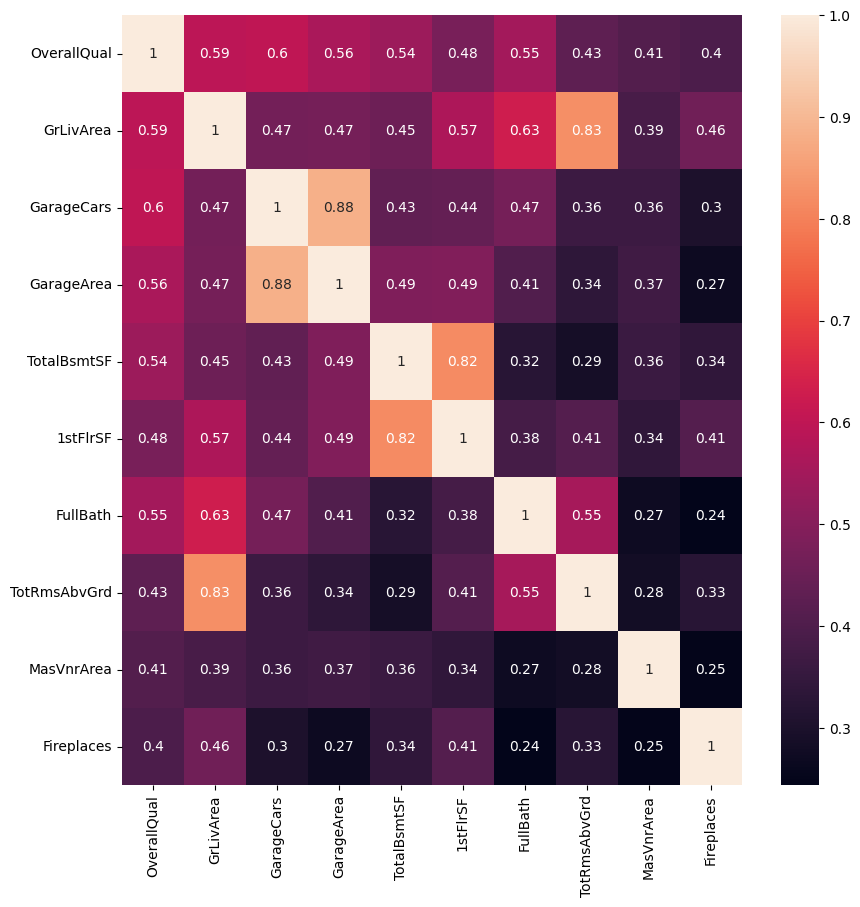

In [8]:
# top features with high correlation with the target
threshold = 0.4
top_features = correlation[correlation > threshold]
print("Features with correlation higher than 0.4: ")
print(top_features)
print("\n")

# Check for multicollinearity among the top features
corr_matrix_top_features = df_num[top_features.index].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_top_features, annot=True)
plt.show()

In [9]:
# Drop one of the highly correlated features with one another,correration > 0.8
high_corr_feature_pairs = []
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        if abs(corr_matrix_top_features.iloc[i, j]) > 0.8:
            high_corr_feature_pairs.append((top_features.index[i], top_features.index[j]))
print("Highly correlated feature pairs: ", high_corr_feature_pairs)
print("\n")

# Randomly drop one of the features in the highly correlated pairs
import random
for pair in high_corr_feature_pairs:
    drop_feature = random.choice(pair)
    if drop_feature in top_features:
        top_features = top_features.drop(drop_feature)

print("Features with correlation higher than 0.8 after dropping highly correlated features: ")
print(top_features)


Highly correlated feature pairs:  [('GrLivArea', 'TotRmsAbvGrd'), ('GarageCars', 'GarageArea'), ('TotalBsmtSF', '1stFlrSF')]


Features with correlation higher than 0.8 after dropping highly correlated features: 
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
1stFlrSF       0.605852
FullBath       0.560664
MasVnrArea     0.472614
Fireplaces     0.466929
Name: SalePrice, dtype: float64


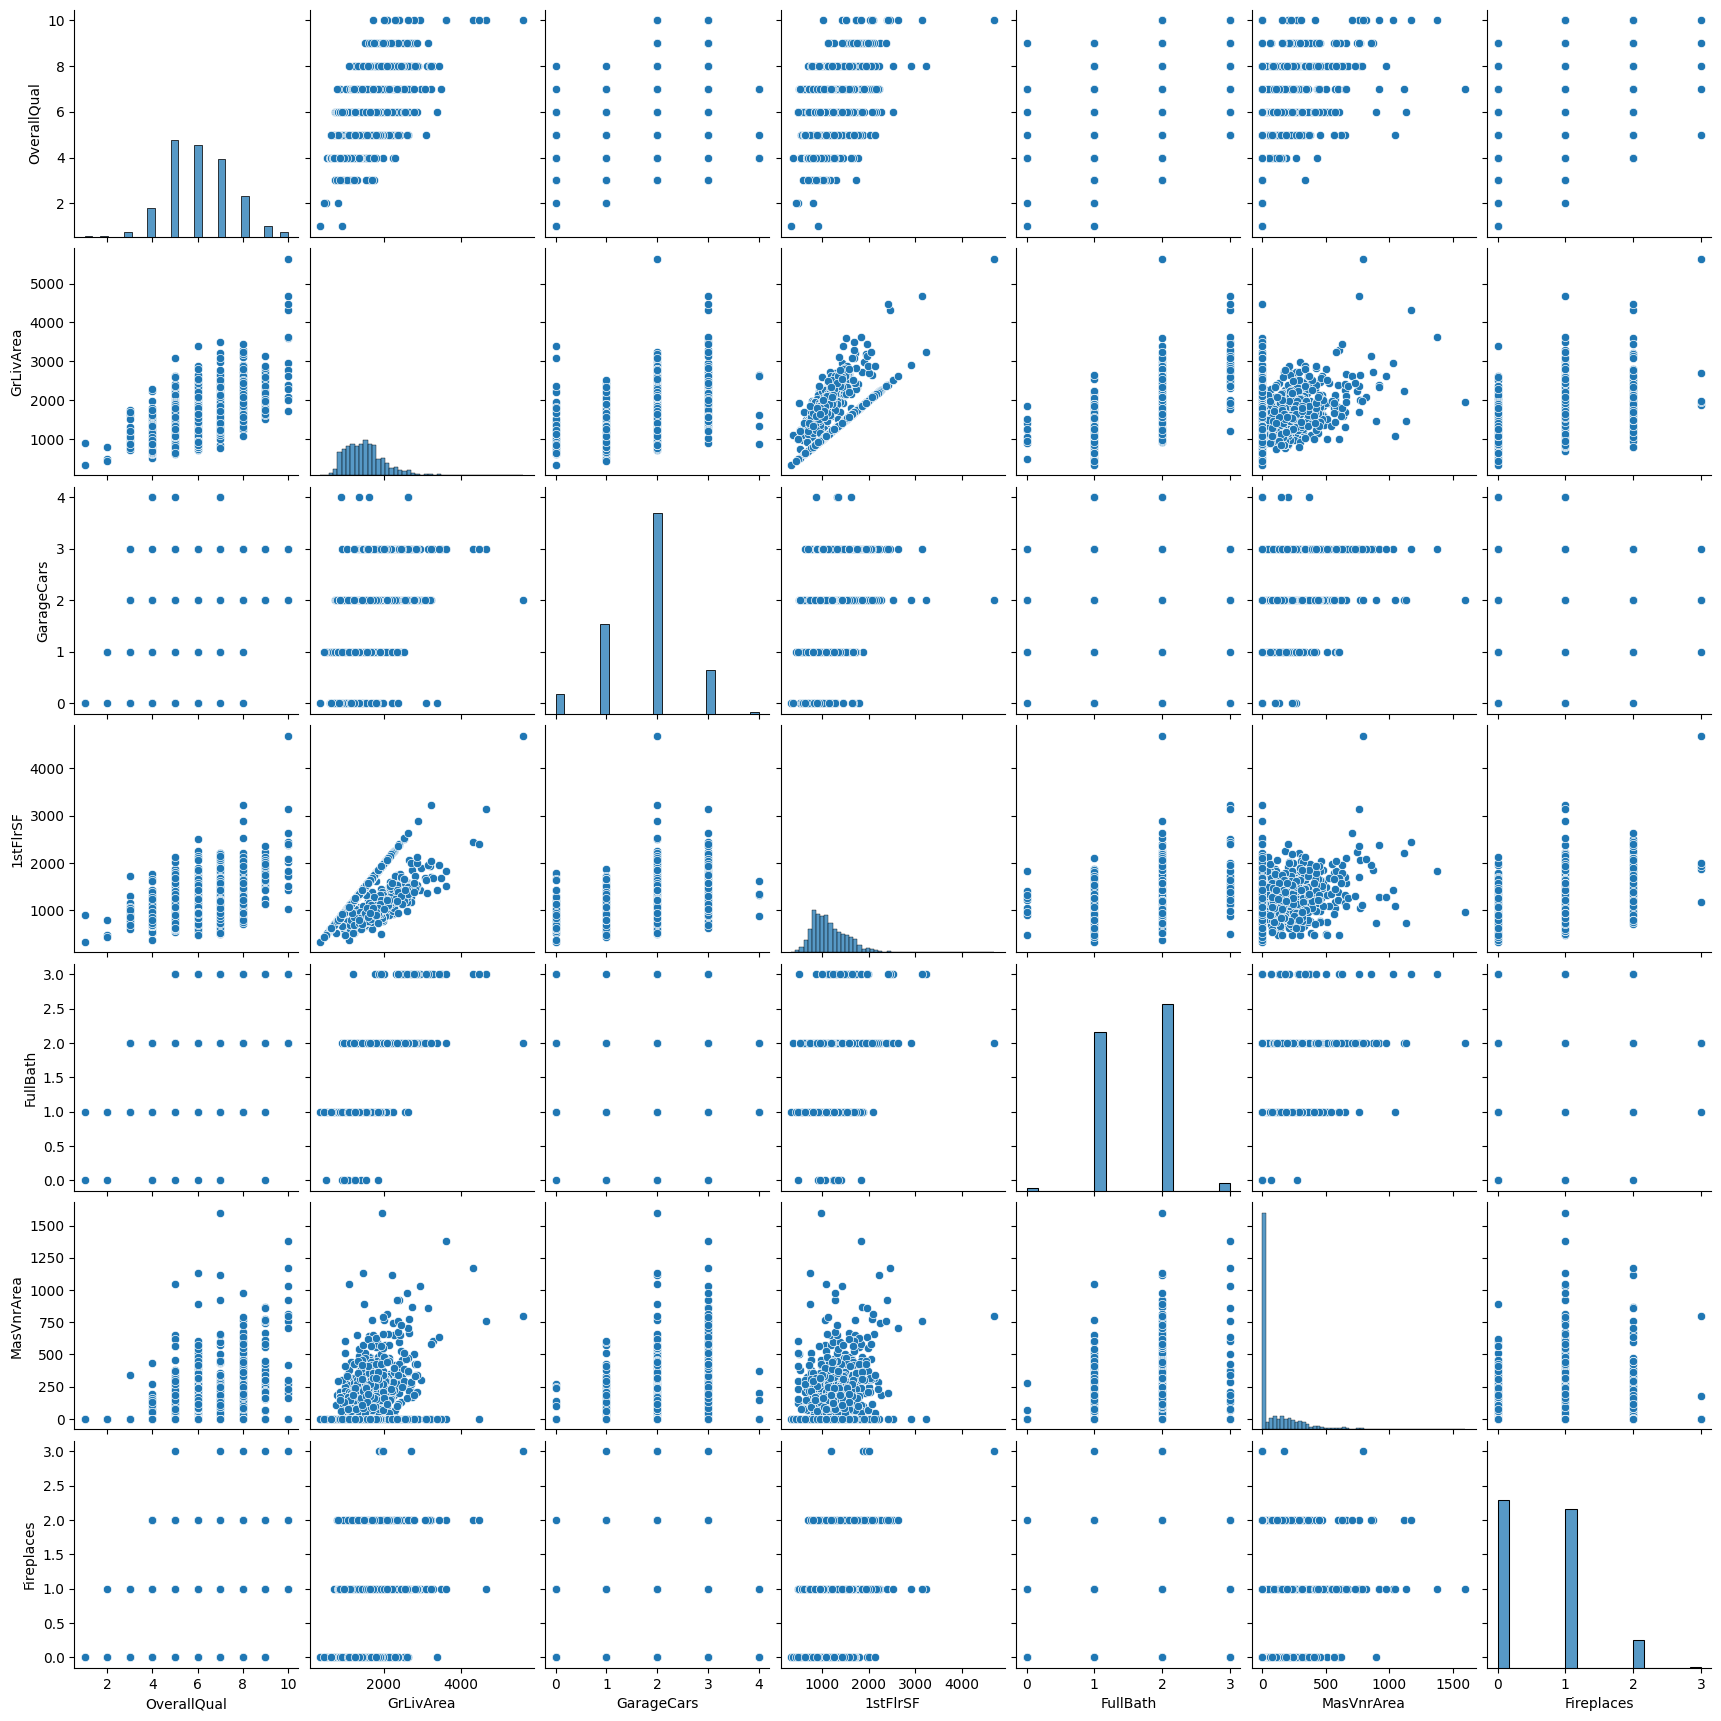

In [10]:
# Now we plot pairplot for top features
sns.pairplot(df_num[top_features.index])
plt.show()

Analysis of **ordinal** data
1. Use correlation matrix to find top features.
2. Use pairplot to visualize them.

In [ ]:
# Analysis of ordinal data
# Find the correlation between the ordinal data and the target
ord_correlation = encoded_ord_df.corr()
ord_correlation = ord_correlation['SalePrice'].sort_values(ascending=False)
ord_correlation = ord_correlation.drop('SalePrice')
print(ord_correlation)

# Save csv file
# ord_correlation.to_csv('../data/ord_correlation.csv')

Electrical      0.234990
GarageCond      0.150576
Functional      0.115328
GarageQual      0.115119
BsmtCond        0.060362
LandSlope       0.051152
BsmtFinType2    0.041161
BsmtFinType1   -0.064531
FireplaceQu    -0.166817
HeatingQC      -0.400178
KitchenQual    -0.589189
PoolQC         -0.595229
BsmtQual       -0.611179
Name: SalePrice, dtype: float64


Top 7 ordinal features: 
Electrical      0.234990
GarageCond      0.150576
Functional      0.115328
GarageQual      0.115119
BsmtCond        0.060362
LandSlope       0.051152
BsmtFinType2    0.041161
Name: SalePrice, dtype: float64




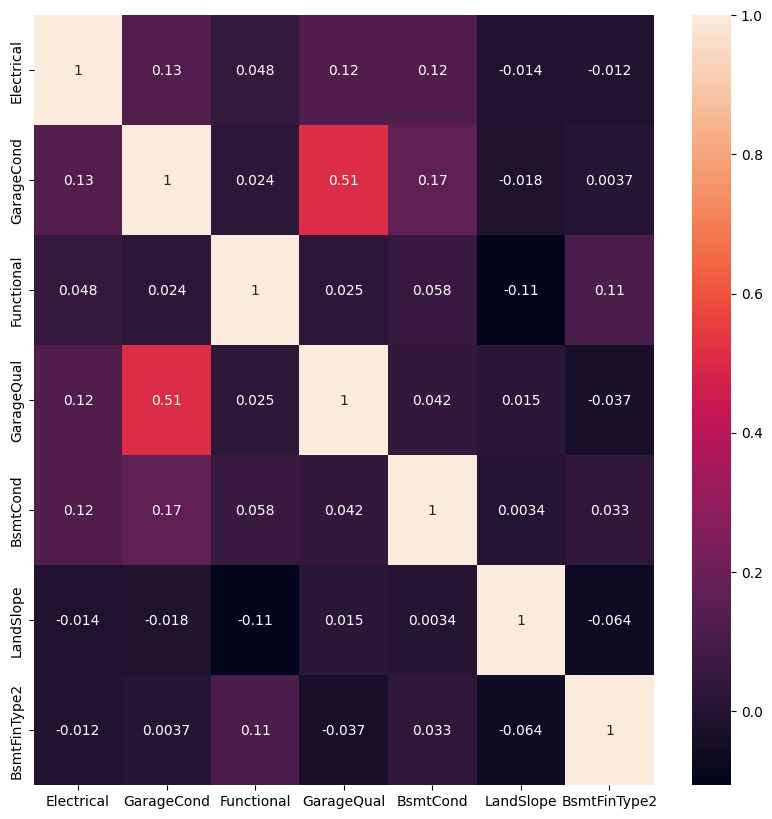

In [12]:
# top ordinal features with high correlation with the target
threshold = 0.4
top_ord_features = ord_correlation.head(7) # top 7 ordinal features
print("Top 7 ordinal features: ")
print(top_ord_features)
print("\n")

# Check for multicollinearity among the top ordinal features
ord_corr_matrix_top_features = encoded_ord_df[top_ord_features.index].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(ord_corr_matrix_top_features, annot=True)
plt.show()

In [13]:
# Drop one of the highly correlated ordinal features with one another,correration > 0.8
ord_high_corr_feature_pairs = []
for i in range(len(top_ord_features)):
    for j in range(i+1, len(top_ord_features)):
        if abs(ord_corr_matrix_top_features.iloc[i, j]) > 0.8:
            ord_high_corr_feature_pairs.append((top_ord_features.index[i], top_ord_features.index[j]))
print("Highly correlated ordinal feature pairs: ")
print(ord_high_corr_feature_pairs)
print("\n")

# Randomly drop one of the features in the highly correlated pairs
import random
for pair in ord_high_corr_feature_pairs:
    drop_feature = random.choice(pair)
    if drop_feature in top_ord_features:
        top_ord_features = top_ord_features.drop(drop_feature)

print("Ordinal features with correlation higher than 0.8 after dropping highly correlated features: ")
print(top_ord_features)

Highly correlated ordinal feature pairs: 
[]


Ordinal features with correlation higher than 0.8 after dropping highly correlated features: 
Electrical      0.234990
GarageCond      0.150576
Functional      0.115328
GarageQual      0.115119
BsmtCond        0.060362
LandSlope       0.051152
BsmtFinType2    0.041161
Name: SalePrice, dtype: float64


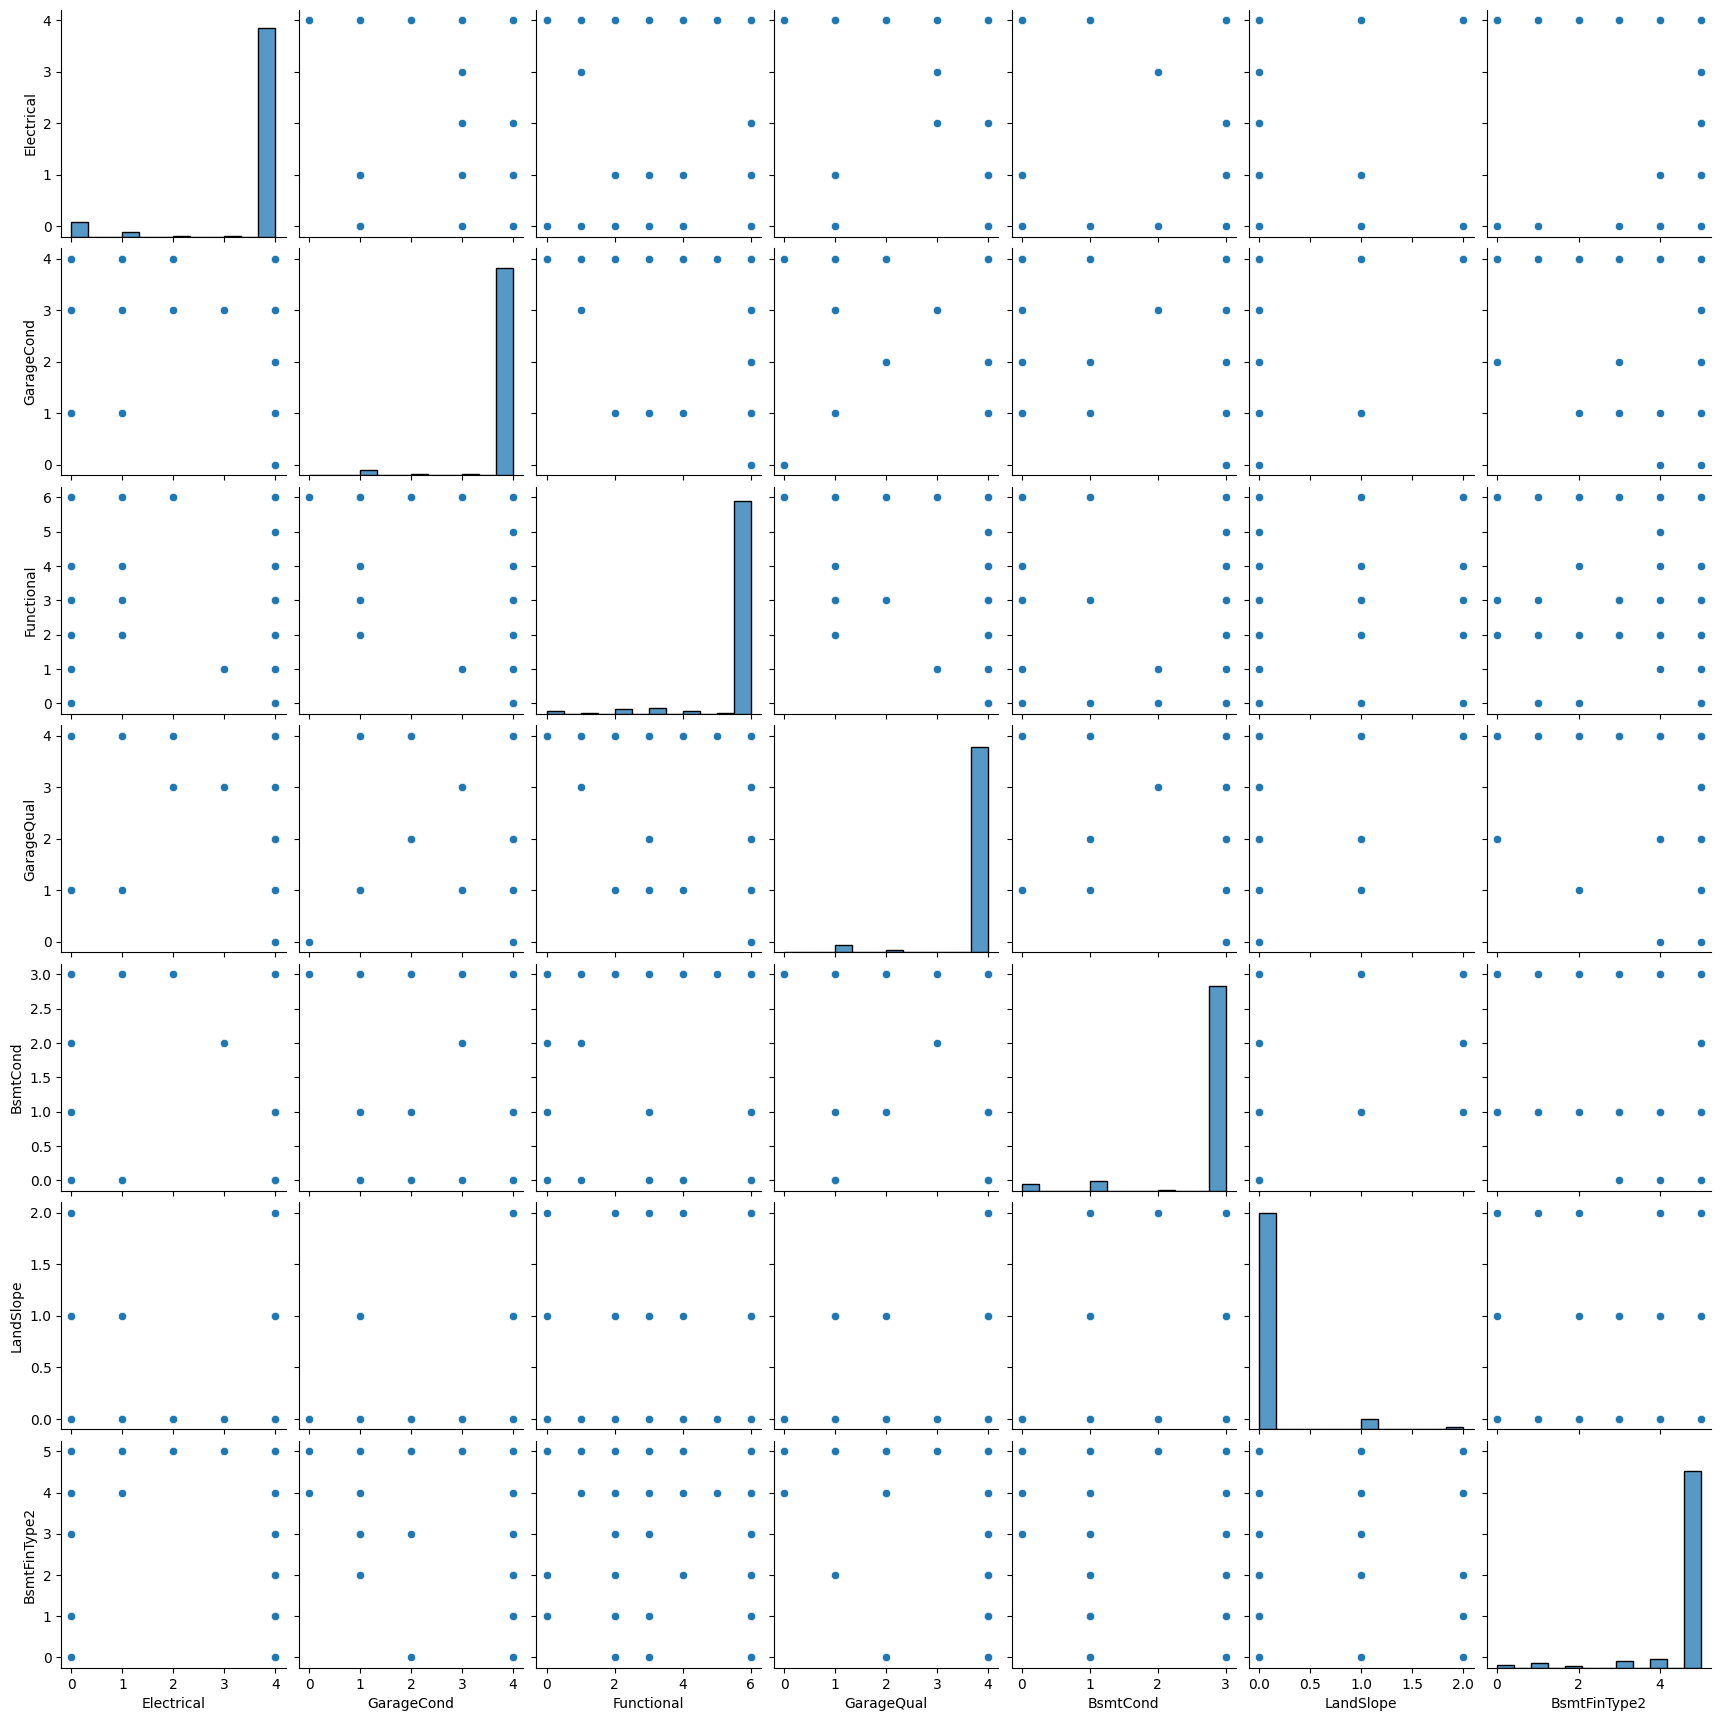

In [14]:
# Now we plot pairplot for top ordinal features
sns.pairplot(encoded_ord_df[top_ord_features.index])
plt.show()

Using RandomForestRegressor with Descision Tree to find important **categorical** features

In [15]:
df_cat = data_processor.categorical_data(ohe=True)
df_cat_uncoded = data_processor.categorical_data(ohe=False)
df_cat_uncoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,GarageYrBlt,MoSold,YrSold
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,WD,Normal,60,2003,2003,1,0,2003.0,2,2008
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,WD,Normal,20,1976,1976,0,1,1976.0,5,2007
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,WD,Normal,60,2001,2002,1,0,2001.0,9,2008
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,WD,Abnorml,70,1915,1970,1,0,1998.0,2,2006
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,WD,Normal,60,2000,2000,1,0,2000.0,12,2008


In [16]:
# Finding feature importacne using Random Forest Regressor with decision tree for categorical data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df_cat
y = df_num['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42) # 100 decision trees
model.fit(X_train, y_train)

# How it calculates the feature importance?
# The feature importance is calculated based on the decrease in node impurity weighted by the probability of reaching that node.
# The more a feature decreases the impurity, the more important it is.
# The importance of a feature is calculated as the (normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance.

# Get feature importances
feature_importances = model.feature_importances_
feature_importances = pd.Series(feature_importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature importances: ")
print(feature_importances)

# Save csv file
# feature_importances.to_csv('../data/cat_feature_importances.csv')

Feature importances: 
ExterQual_TA            0.336089
ExterQual_Ex            0.068079
MSSubClass_60           0.033739
RoofStyle_Hip           0.032093
Neighborhood_NoRidge    0.028390
                          ...   
RoofMatl_Membran        0.000000
GarageYrBlt_1927.0      0.000000
YearBuilt_1927          0.000000
GarageYrBlt_1933.0      0.000000
GarageYrBlt_1947.0      0.000000
Length: 506, dtype: float64


Top 10 features based on feature importances: 
ExterQual_TA            0.336089
ExterQual_Ex            0.068079
MSSubClass_60           0.033739
RoofStyle_Hip           0.032093
Neighborhood_NoRidge    0.028390
BsmtExposure_Gd         0.021349
Neighborhood_NridgHt    0.016824
GarageType_Attchd       0.015752
Neighborhood_Crawfor    0.013303
GarageType_Detchd       0.009916
dtype: float64


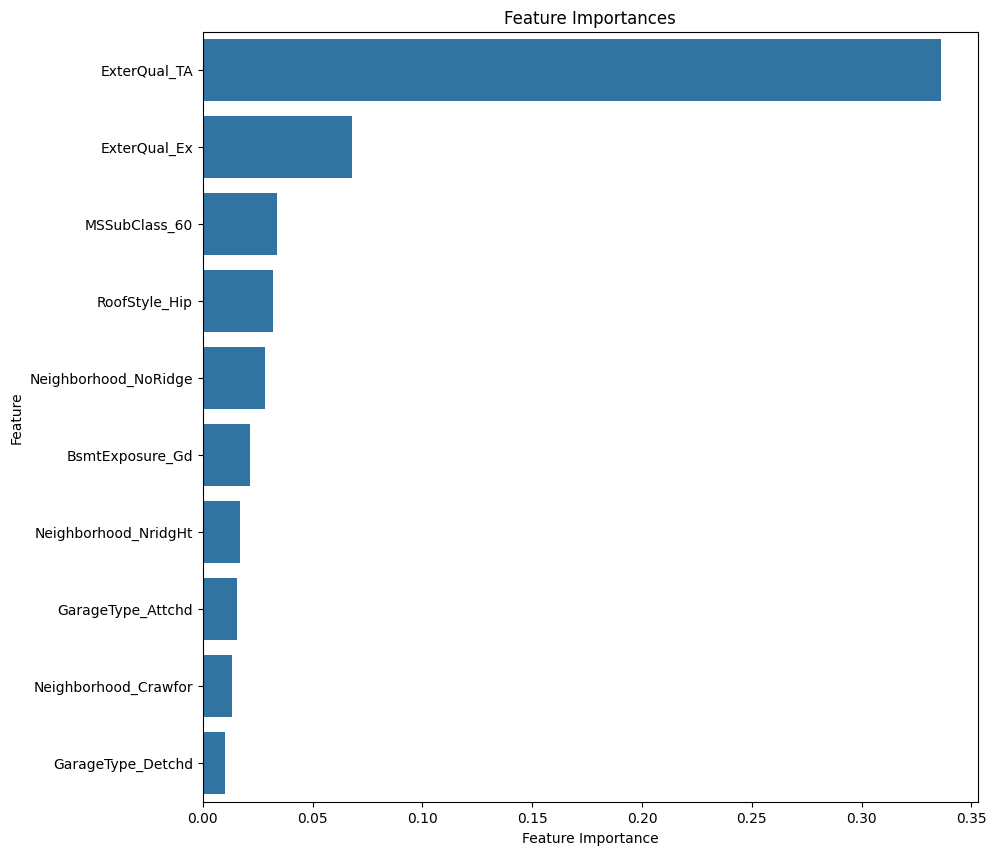

In [17]:
# Get top 10 features based on feature importances
top_features = feature_importances.head(10)
print("Top 10 features based on feature importances: ")
print(top_features)

# Visualize the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x=top_features, y=top_features.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [18]:
# train model using top 10 features
X = df_cat[top_features.index]
y = df_num['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42) # 100 decision trees
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# print all the matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# print rmse
rmse = mse ** 0.5
print("Root Mean Squared Error: ", rmse)

# print accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Mean Squared Error:  2534768790.7427626
Mean Absolute Error:  31844.779548121016
Mean Squared Error:  2534768790.7427626
R2 Score:  0.6695357247821254
Root Mean Squared Error:  50346.487372435055
Accuracy:  0.6695357247821254
